In [1]:
pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 11.0 MB/s eta 0:00:00


In [7]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [4]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    number3: int
    operation2: str
    number4: int
    finalNumber1: int
    finalNumber2: int

In [5]:
def adder1(state: AgentState):
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def subtracter1(state: AgentState):
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def adder2(state: AgentState):
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def subtracter2(state: AgentState):
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

In [6]:
def decide_operation_1(state: AgentState):
    if state["operation1"] == "+":
        return "addition_operation1"
    elif state["operation1"] == "-":
        return "subtraction_operation1"

def decide_operation_2(state: AgentState):
    if state["operation2"] == "+":
        return "addition_operation2"
    elif state["operation2"] == "-":
        return "subtraction_operation2"

In [8]:
graph = StateGraph(AgentState)

graph.add_node("add_node1", adder1)
graph.add_node("subtract_node1", subtracter1)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtracter2)
graph.add_node("router1", lambda state:state)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide_operation_1,
    {
        "addition_operation1": "add_node1",
        "subtraction_operation1": "subtract_node1",
    }
)

graph.add_edge("add_node1", "router2")
graph.add_edge("subtract_node1", "router2")

graph.add_conditional_edges(
    "router2",
    decide_operation_2,
    {
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2",
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

In [9]:
app = graph.compile()

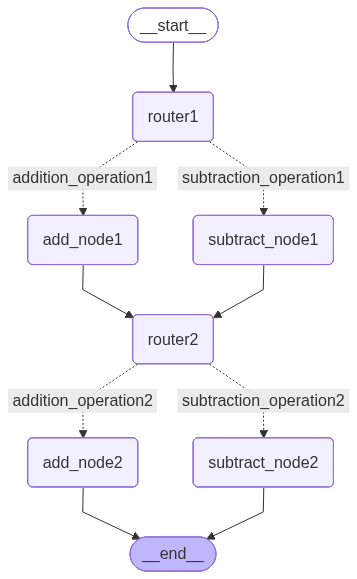

In [10]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
result = app.invoke(
    {
        "number1": 10,
        "operation1": "-",
        "number2": 5,
        "number3": 7,
        "operation2": "+",
        "number4": 2,
    }
)

In [12]:
print(result)

{'number1': 10, 'operation1': '-', 'number2': 5, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber1': 5, 'finalNumber2': 9}
